C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [11:37:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


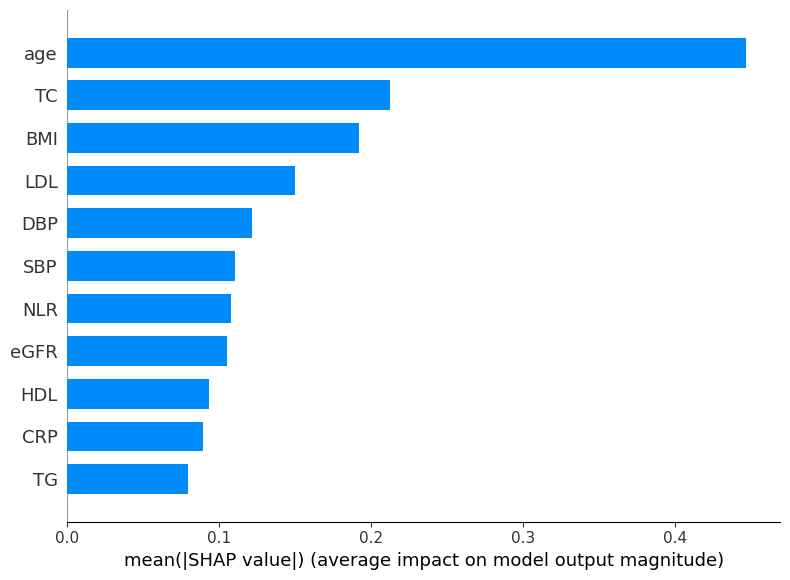

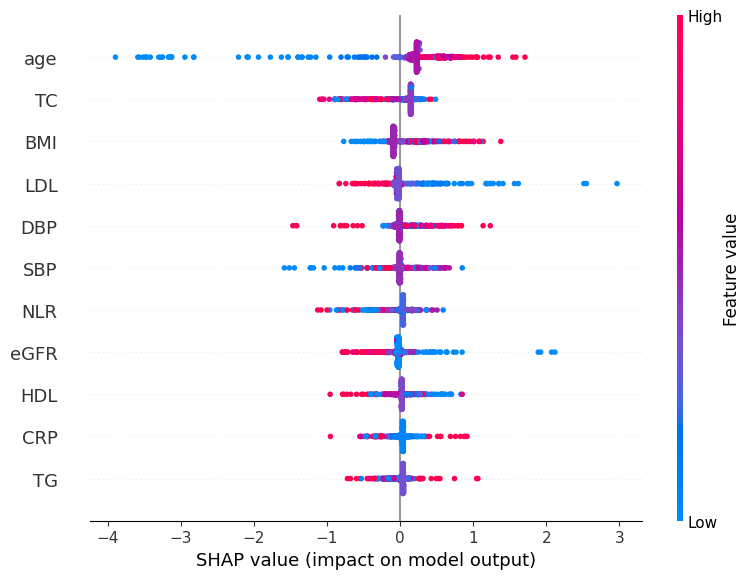

In [1]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (이미 로드된 경우 생략 가능)
df = pd.read_excel("CACS_model_ready_imputed.xlsx")
df["CACS_binary"] = (df["CACS"] >= 100).astype(int)
X = df.drop(columns=["CACS", "CACS_binary"])
y = df["CACS_binary"]

# 2. 학습/검증 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. XGBoost 모델 훈련 (이미 학습된 경우 생략 가능)
model = xgb.XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 4. SHAP explainer 생성 (TreeExplainer 사용)
explainer = shap.Explainer(model, X_train)

# 5. SHAP 값 계산
shap_values = explainer(X_test)

# 6. 요약 플롯 (전반적인 변수 영향력 시각화)
shap.summary_plot(shap_values, X_test, plot_type="bar")  # 중요도 바 차트
shap.summary_plot(shap_values, X_test)  # beeswarm plot
